**Element Information**

The elements taht can be used in this tutorial are:

    "D1_nn2": 1D element with 2 nodes
    "D1_nn3": 1D element with 3 nodes
    "D2_nn3_tri": 2D triangular element with 3 nodes
    "D2_nn6_tri": 2D triangular element with 6 nodes
    "D2_nn4_quad": 2D quadrilateral element with 4 nodes
    "D2_nn8_quad": 2D quadrilateral element with 8 nodes

You can retrieve information for each element using the `element_info` function in the `discretization.py` file. It returns a tuple of size 3, where each element in the tuple is:

    int: The number of coordinates (1 for 1D, 2 for 2D, 3 for 3D).
    int: The number of degrees of freedom (equal to the number of coordinates).
    int: The number of nodes in the element.

In [15]:
import numpy as np
from finiteelementanalysis import discretization as di

# Specify the type of finite element we are working with
element_type = "D2_nn3_tri"

# Query information about the element using a helper function
# element_info() typically returns details such as:
#  (1) n_coords: number of coordinates (e.g., 2D or 3D)
#  (2) n_DoF: number of degrees of freedom per node
#  (3) n_nodes_elem: number of nodes in this element
elem_info = di.element_info(element_type)

# Unpack the returned tuple into separate variables
n_coords, n_DoF, n_nodes_elem = elem_info

# Print out the element characteristics for clarity
print(f"The number of coordinates is {n_coords}, "
      f"the number of degrees of freedom per node is {n_DoF}, "
      f"and the number of nodes in the element is {n_nodes_elem}")


The number of coordinates is 2, the number of degrees of freedom per node is 2, and the number of nodes in the element is 3


**Interpolation in the field of natural coordinates**

We want to take a look at the function `interpolate_field_natural_coords_single_element` in the file `discretization_demo_helper_fcns.py`. But we can also visualize it.

We can use the function `plot_interpolate_field_natural_coords_single_element` to visualize the interpolation.

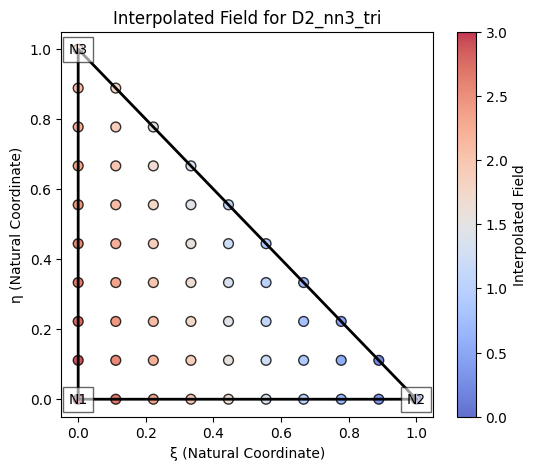

In [14]:
# Import relevant modules
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo
import numpy as np

def fcn(xi, eta):
    """
    Define a scalar field in terms of the natural coordinates (xi, eta) of a
    triangular element. For example:
       f(xi, eta) = 2 * xi + 3 * eta + 1.5 * xi * eta

    Parameters:
    xi  (float): 1st natural coordinate
    eta (float): 2nd natural coordinate

    Returns:
    float: value of the function f at (xi, eta)
    """
    return 2.0 * xi + 3.0 * eta + 1.5 * xi * eta

# Specify the element type as a 3-node triangle in 2D
ele_type = "D2_nn3_tri"

# Define the triangle's node coordinates in the natural (reference) coordinate system.
# For a standard reference triangle, the nodes are often:
#   (0, 0), (1, 0), (0, 1)
node_coords = np.array([
    [0, 0],  # Node 1 in reference coords
    [1, 0],  # Node 2
    [0, 1]   # Node 3
])

# Evaluate the function at each of the triangle's nodes to get the nodal values
node_values = np.array([fcn(xi, eta) for xi, eta in node_coords])

# Specify the output filename for saving the plot
fname = ele_type + "_interpolate_fcn.png"

# Generate and save a visualization of how the field "fcn" is interpolated
# across the triangular element in its natural coordinate system.
di_demo.plot_interpolate_field_natural_coords_single_element(
    fname,
    ele_type,
    node_values
)


**Interpolation of a field in the physical coordinate system**

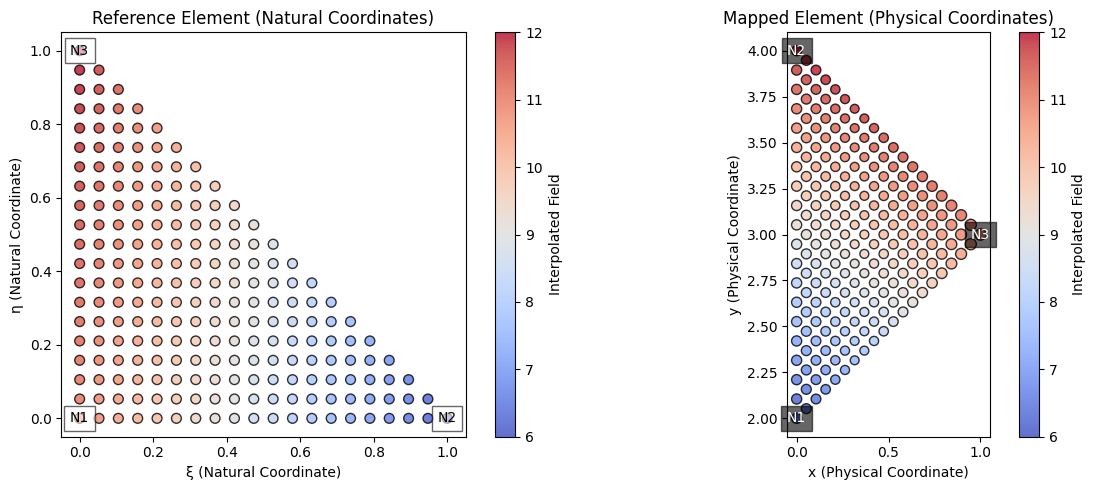

In [13]:
# Import the helper function for visualization and NumPy for array operations
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo
import numpy as np

def fcn(x, y):
    """
    A simple linear function of two variables: f(x, y) = 2*x + 3*y.

    Parameters:
    x (float): The x-coordinate.
    y (float): The y-coordinate.

    Returns:
    float: The evaluated function value at (x, y).
    """
    return 2.0 * x + 3.0 * y

# Define the element type: a 3-node triangular finite element
ele_type = "D2_nn3_tri"

# Specify the physical coordinates of the triangle's three nodes
# Each row: [x, y]
node_coords = np.array([
    [0, 2],  # Node 1
    [0, 4],  # Node 2
    [1, 3]   # Node 3
])

# Compute the function values at each node (i.e., nodal values)
node_values = np.array([fcn(x, y) for x, y in node_coords])

# Create a filename for saving the visualization
fname = ele_type + "_interpolate_fcn_physical_coords.png"

# Visualize the isoparametric mapping for a single element
# This generates a plot showing how the shape functions interpolate
# both the geometry (node_coords) and the scalar field (node_values).
# The resulting plot is saved to the specified file name.
di_demo.visualize_isoparametric_mapping_single_element(
    str(fname),
    ele_type,
    node_coords,
    node_values
)

**Interpolation of derivatives in the physical coordinate system**

In [12]:
# interpolation of derivatives in the physical coordinate system
# Here, we demonstrate evaluating the derivative of a function both
# analytically and numerically (via finite element interpolation),
# and check if they match.

from finiteelementanalysis import discretization_demo_helper_fcns as di_demo
import numpy as np

def fcn(x, y):
    """
    A simple linear function f(x,y) = 2*x - 3*y.

    Parameters:
    x (float) : x-coordinate
    y (float) : y-coordinate

    Returns:
    float: The value f(x, y) = 2.0*x - 3.0*y
    """
    return 2.0 * x - 3.0 * y

def fcn_deriv(x, y):
    """
    The gradient (partial derivatives) of f(x, y) = 2*x - 3*y.

    For this specific function:
      df/dx = 2.0
      df/dy = -3.0

    Parameters:
    x (float) : x-coordinate (not used directly since derivative is constant)
    y (float) : y-coordinate (not used directly since derivative is constant)

    Returns:
    numpy.ndarray of shape (2,1): The constant gradient [2.0, -3.0]^T
    """
    return np.asarray([2.0, -3.0]).reshape((2, 1))

# Define the finite element type (a 3-node triangle)
ele_type = "D2_nn3_tri"

# Define the nodal coordinates of the triangle in physical space
# Each row is [x, y] for one node
node_coords = np.array([
    [0, 2],  # Node 1
    [0, 4],  # Node 2
    [1, 3]   # Node 3
])

# Compute the function values at each node (nodal values)
node_values = np.array([fcn(x, y) for x, y in node_coords])

# Define a point in the element's natural coordinate system (xi, eta).
# For a triangle, these often represent barycentric or similar reference coords.
xi, eta = 0.5, 0.2

# Map the chosen point (xi, eta) from the element's natural coordinate system
# to physical (x, y) coordinates by interpolating node_coords:
x_mapped = di_demo.interpolate_field_natural_coords_single_element(
    ele_type, node_coords[:, 0], [xi], [eta]
).flatten()[0]

y_mapped = di_demo.interpolate_field_natural_coords_single_element(
    ele_type, node_coords[:, 1], [xi], [eta]
).flatten()[0]

# Evaluate the function's exact (analytical) derivative at that mapped physical point
mapped_deriv = fcn_deriv(x_mapped, y_mapped)

# Compute the derivative (gradient) using finite element shape functions.
# First, interpolate the gradient in natural coordinates:
gradient_natural = di_demo.interpolate_gradient_natural_coords_single_element(
    ele_type, node_values, np.array([xi]), np.array([eta])
)

# Convert (transform) the gradient from the natural coordinate basis
# to the physical coordinate basis:
gradient_physical = di_demo.transform_gradient_to_physical(
    ele_type, node_coords, np.array([xi]), np.array([eta]), gradient_natural
).reshape((2, 1))

# Compare the analytical derivative with the finite element numerical result
if np.allclose(mapped_deriv, gradient_physical, atol=1e-10):
    print("analytical and numerical derivatives match!")
else:
    print("analytical and numerical derivatives do not match!")

# Print out the values for clarity
print("Analytical derivative:\n", mapped_deriv)
print("Numerical derivative:\n", gradient_physical)


analytical and numerical derivatives match!
Analytical derivative:
 [[ 2.]
 [-3.]]
Numerical derivative:
 [[ 2.]
 [-3.]]


**Integration of derivatives in the physical coordinate system**

In [8]:
# Import helper functions from a finite element analysis demo module
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo

# Import NumPy for numerical computations
import numpy as np

def fcn(x, y):
    """
    A simple linear function f(x, y) = 3.0*x + 10.0*y.

    Parameters:
    x (float) : x-coordinate
    y (float) : y-coordinate

    Returns:
    float : value of f at (x, y)
    """
    return 3.0 * x + 10.0 * y

def fcn_deriv(x, y):
    """
    The exact gradient of f(x, y) = 3.0*x + 10.0*y.
    For this specific f, partial derivatives are constant:
      df/dx = 3.0
      df/dy = 10.0

    Parameters:
    x (float) : x-coordinate (not used here)
    y (float) : y-coordinate (not used here)

    Returns:
    numpy.ndarray : 2-element array [df/dx, df/dy]
    """
    return np.asarray([3.0, 10.0])

def element_area(node_coords):
    """
    Compute the area of a triangle given by node_coords,
    using the shoelace formula for the area of a polygon.

    Parameters:
    node_coords (numpy.ndarray) : An array of shape (3, 2), where each
                                  row contains [x, y] for a triangle's vertex

    Returns:
    float : The area of the triangle
    """
    # Unpack coordinates for clarity
    x1, y1 = node_coords[0]
    x2, y2 = node_coords[1]
    x3, y3 = node_coords[2]

    # Shoelace formula / 2 for triangle area
    area = 0.5 * (x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2))
    return area

def integral_of_deriv(node_coords):
    """
    Compute the analytical integral of the derivative of f(x, y)
    over the triangular element.

    For f(x, y) = 3*x + 10*y, the derivative is constant [3, 10].
    The integral of a constant gradient vector over an area A is
        gradient * A.

    Parameters:
    node_coords (numpy.ndarray) : An array of shape (3, 2), the triangle's node coordinates

    Returns:
    numpy.ndarray : (2,1) array for the integral of [df/dx, df/dy] across the element
    """
    # Compute the area of the element
    area = element_area(node_coords)
    # Multiply the constant derivative by the area
    return np.array([3.0 * area, 10.0 * area]).reshape((2, 1))

# Specify the element type (linear triangle) and number of Gauss points
ele_type = "D2_nn3_tri"
num_gauss_pts = 3

# Define the triangle's node coordinates
node_coords = np.array([[1, 1],   # Node 1: (x1, y1)
                        [0, 1.5], # Node 2: (x2, y2)
                        [2, 1.1]])# Node 3: (x3, y3)

# Compute nodal values by evaluating f at each node coordinate
nodal_values = np.array([[fcn(x, y) for x, y in node_coords]]).T

# Use the helper function to numerically integrate the derivative of f
# over the element using Gaussian quadrature
integral_numerical = di_demo.compute_integral_of_derivative(
    ele_type, num_gauss_pts, node_coords, nodal_values
)

# Compute the analytical integral of the derivative over the element
integral_analytical = integral_of_deriv(node_coords)

# Compare numerical and analytical integrals
if np.allclose(integral_numerical, integral_analytical, atol=1e-10):
    print("analytical and numerical integrals of derivatives match!")
else:
    print("analytical and numerical integrals of derivatives do not match!")

# Print them for inspection
print("Integral (numerical):\n", integral_numerical)
print("Integral (analytical):\n", integral_analytical)


analytical and numerical integrals of derivatives match!
